In [3]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import  to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
Ravdess = "speech_emotion_recognition/dataset_by_ravdes/audio_speech_actors_01-24/"
Crema = "speech_emotion_recognition/dataset_by_cremad/AudioWAV/"
Tess = "speech_emotion_recognition/dataset_by_tess/TESS Toronto emotional speech set data/"
Savee = "speech_emotion_recognition/surrey-audiovisual-expressed-emotion-savee/ALL/"

In [3]:
import os
import pandas as pd

ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,neutral,speech_emotion_recognition/dataset_by_ravdes/a...
1,neutral,speech_emotion_recognition/dataset_by_ravdes/a...
2,neutral,speech_emotion_recognition/dataset_by_ravdes/a...
3,neutral,speech_emotion_recognition/dataset_by_ravdes/a...
4,calm,speech_emotion_recognition/dataset_by_ravdes/a...


# New section

In [4]:
import os
import pandas as pd

crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,angry,speech_emotion_recognition/dataset_by_cremad/A...
1,disgust,speech_emotion_recognition/dataset_by_cremad/A...
2,fear,speech_emotion_recognition/dataset_by_cremad/A...
3,happy,speech_emotion_recognition/dataset_by_cremad/A...
4,neutral,speech_emotion_recognition/dataset_by_cremad/A...


In [5]:
import os
import pandas as pd
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

,Emotions,Path
0,angry,speech_emotion_recognition/surrey-audiovisual-...
1,angry,speech_emotion_recognition/surrey-audiovisual-...
2,angry,speech_emotion_recognition/surrey-audiovisual-...
3,angry,speech_emotion_recognition/surrey-audiovisual-...
4,angry,speech_emotion_recognition/surrey-audiovisual-...


In [6]:
import os
import pandas as pd

tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,angry,speech_emotion_recognition/dataset_by_tess/TES...
1,angry,speech_emotion_recognition/dataset_by_tess/TES...
2,angry,speech_emotion_recognition/dataset_by_tess/TES...
3,angry,speech_emotion_recognition/dataset_by_tess/TES...
4,angry,speech_emotion_recognition/dataset_by_tess/TES...


In [8]:
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
# data_path = pd.concat([Ravdess_df,Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,neutral,speech_emotion_recognition/dataset_by_ravdes/a...
1,neutral,speech_emotion_recognition/dataset_by_ravdes/a...
2,neutral,speech_emotion_recognition/dataset_by_ravdes/a...
3,neutral,speech_emotion_recognition/dataset_by_ravdes/a...
4,calm,speech_emotion_recognition/dataset_by_ravdes/a...


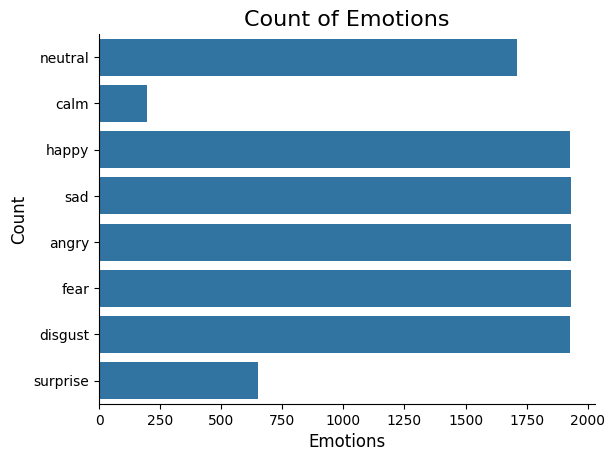

In [9]:
import matplotlib.pyplot as plt

plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [13]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr,color='RED')
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

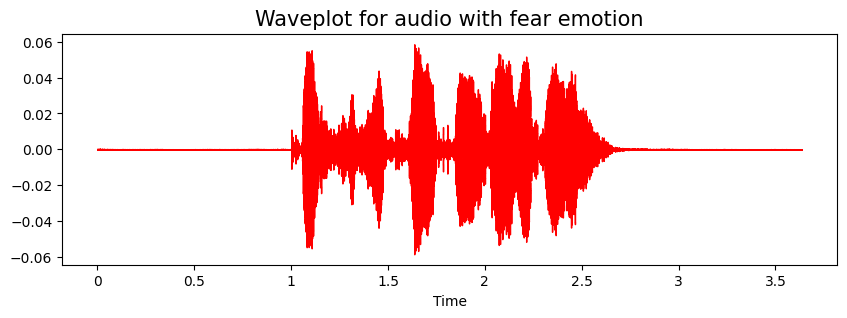

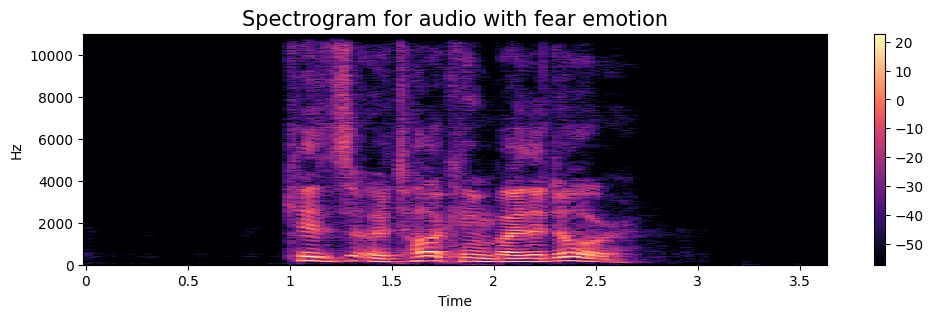

In [14]:
import librosa.display
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [15]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=0.8)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

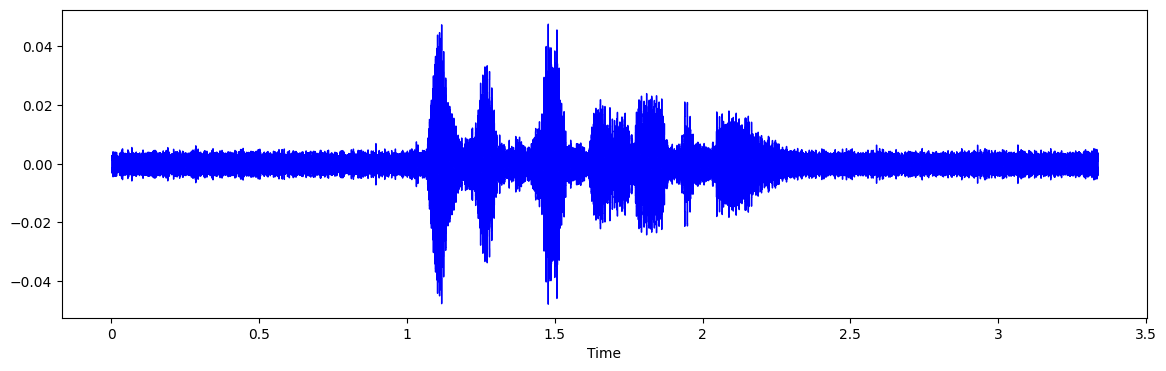

In [17]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate,color='BLUE')
Audio(x, rate=sample_rate)

In [18]:
def extract_features(data):
    # data, sample_rate = librosa.load(path)
    # # ZCR
    result = np.array([])
    # zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    # result=np.hstack((result, zcr)) # stacking horizontally

    # # Chroma_stft
    # stft = np.abs(librosa.stft(data))
    # chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    # result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally
    return result
    # # Root Mean Square Value
    # rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    # result = np.hstack((result, rms)) # stacking horizontally

    # # MelSpectogram
    # mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    # result = np.hstack((result, mel)) # stacking horizontally

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    return result


In [19]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [20]:
len(X), len(Y), data_path.Path.shape

(36624, 36624, (12208,))

In [21]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,labels
0,-645.880737,72.619637,0.841305,16.399446,10.241591,0.653901,-4.328002,-4.258932,-14.575824,-3.806285,...,-4.042665,2.519602,-4.972247,0.566447,1.035527,-5.416451,-2.449469,-1.782306,-1.212806,neutral
1,-511.768924,44.482776,5.832025,11.432903,7.339238,-0.067891,-3.882506,-7.431592,-11.478215,-6.197777,...,-2.220497,-1.174458,-2.989871,-1.321738,-0.282728,-5.019790,-3.283975,-0.423655,-3.412704,neutral
2,-712.554138,70.982559,-0.730791,16.815754,7.991097,-0.822035,-6.391328,-6.146841,-15.975542,-0.313774,...,-3.398325,2.348432,-6.031354,1.242991,-1.837347,-5.671210,-3.115795,-1.071987,-4.964169,neutral
3,-634.663269,72.324066,-2.998578,20.209740,10.674218,-1.151011,-2.813592,-7.923956,-16.231958,-2.627547,...,-4.167823,0.719305,-4.954944,-0.688254,0.114427,-6.475232,-1.695712,-2.899729,0.377745,neutral
4,-451.567495,31.081136,8.384713,10.735331,5.756185,-0.721222,-2.776434,-7.216486,-10.053806,-5.054153,...,-2.427092,-1.656463,-2.272861,-1.496159,-0.730611,-4.415060,-3.035744,0.279635,-2.503974,neutral


In [22]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [23]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27468, 20), (27468, 8), (9156, 20), (9156, 8))

In [25]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27468, 20), (27468, 8), (9156, 20), (9156, 8))

In [26]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27468, 20, 1), (27468, 8), (9156, 20, 1), (9156, 8))

In [27]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 20, 256)           1536      
                                                                 
 max_pooling1d (MaxPooling1  (None, 10, 256)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 256)           327936    
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 5, 256)            0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 5, 128)            163968    
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 3, 128)          

In [28]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50


430/430 [==============================] - 7s 14ms/step - loss: 1.6963 - accuracy: 0.3232 - val_loss: 1.4981 - val_accuracy: 0.3997 - lr: 0.0010
Epoch 2/50
430/430 [==============================] - 6s 13ms/step - loss: 1.4580 - accuracy: 0.4213 - val_loss: 1.3536 - val_accuracy: 0.4672 - lr: 0.0010
Epoch 3/50
430/430 [==============================] - 6s 13ms/step - loss: 1.3580 - accuracy: 0.4682 - val_loss: 1.3200 - val_accuracy: 0.4784 - lr: 0.0010
Epoch 4/50
430/430 [==============================] - 5s 12ms/step - loss: 1.2845 - accuracy: 0.4948 - val_loss: 1.2331 - val_accuracy: 0.5120 - lr: 0.0010
Epoch 5/50
430/430 [==============================] - 6s 14ms/step - loss: 1.2407 - accuracy: 0.5124 - val_loss: 1.2484 - val_accuracy: 0.4977 - lr: 0.0010
Epoch 6/50
430/430 [==============================] - 6s 13ms/step - loss: 1.2181 - accuracy: 0.5248 - val_loss: 1.2321 - val_accuracy: 0.5141 - lr: 0.0010
Epoch 7/50
430/430 [==============================] - 6s 13ms/

287/287 [==============================] - 1s 4ms/step - loss: 1.4566 - accuracy: 0.5757
Accuracy of model on test data :  57.568806409835815 %


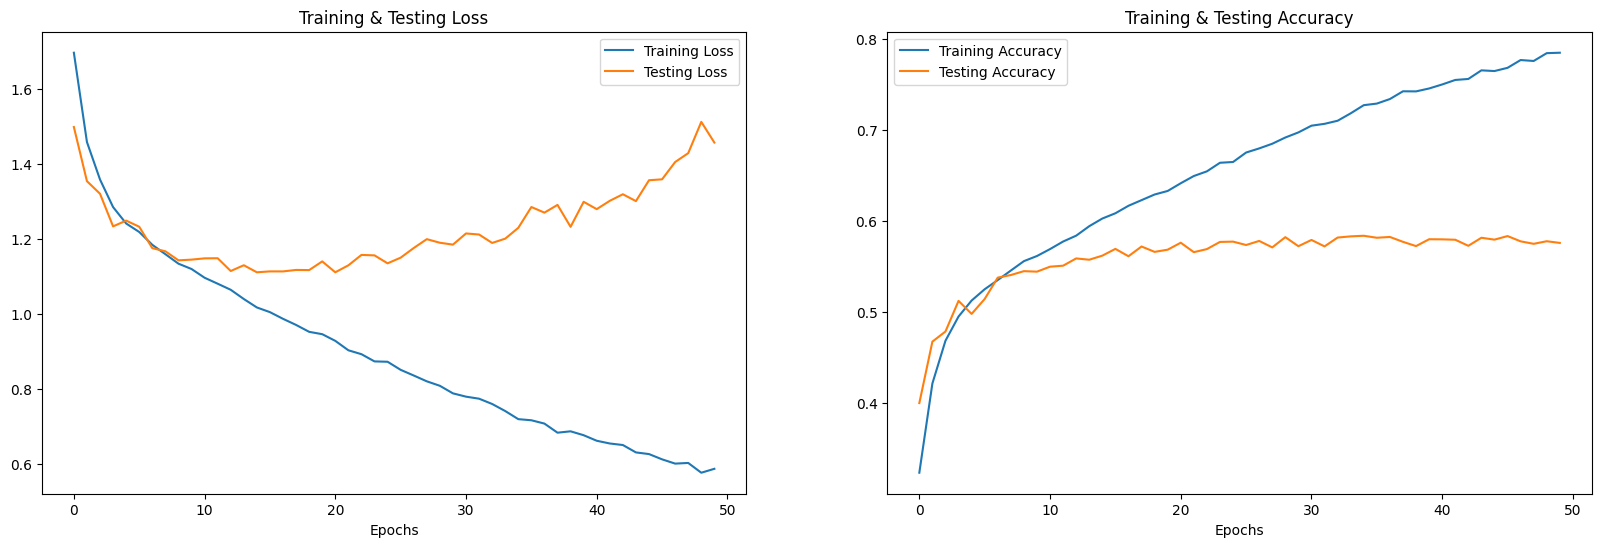

In [29]:
print("Accuracy of model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [30]:
# predicting on test data.
pred_test = model.predict(x_test)
# print(pred_test)
y_pred = encoder.inverse_transform(pred_test)
# print(y_pred)
y_test = encoder.inverse_transform(y_test)

287/287 [==============================] - 1s 3ms/step


In [31]:
print(pred_test.shape)
print(model.layers[-1].output_shape)

(9156, 8)
(None, 8)


In [32]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)


,Predicted Labels,Actual Labels
0,fear,happy
1,fear,happy
2,angry,angry
3,calm,calm
4,sad,sad
5,disgust,disgust
6,calm,calm
7,happy,happy
8,sad,fear
9,neutral,fear


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.66      0.70      0.68      1486
        calm       0.68      0.72      0.70       144
     disgust       0.51      0.52      0.51      1409
        fear       0.53      0.46      0.50      1481
       happy       0.54      0.52      0.53      1481
     neutral       0.50      0.57      0.53      1247
         sad       0.61      0.63      0.62      1440
    surprise       0.84      0.71      0.77       468

    accuracy                           0.58      9156
   macro avg       0.61      0.60      0.61      9156
weighted avg       0.58      0.58      0.58      9156



In [4]:
import sounddevice as sd
import soundfile as sf

# Set the desired audio parameters
sample_rate = 44100  # Sample rate (Hz)
duration = 5  # Duration of recording (seconds)
output_file = 'output.wav'  # Output file name

# Record audio from the microphone
print("Recording audio...")
audio = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1)
sd.wait()  # Wait until recording is finished

# Save the recorded audio to a .wav file
sf.write(output_file, audio, sample_rate)

print("Audio saved as",output_file)

Recording audio...
Audio saved as output.wav


In [2]:
audio_file = 'output.wav'


data, sampling_rate = librosa.load(audio_file)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(audio_file)

NameError: name 'librosa' is not defined

In [ ]:
path_ = '/content/recording.wav'
data_, sample_rate_ = librosa.load(path_)
X_ = np.array(extract_features(data_))
X_ = scaler.transform(X_.reshape(1,-1))
pred_test_ = model.predict(np.expand_dims(X_, axis=2))
y_pred_ = encoder.inverse_transform(pred_test_)
print(y_pred_[0][0]) #emotion prediction

# for value, emotion in zip(pred_test_[0], encoder.categories_[0]):
#   print(emotion, f"{value:.10f}") #predicting values for each emotion

# librosa.display.waveshow(y=data_, sr=sample_rate_)
# Audio(data_, rate=sample_rate_) #for showing and listening audio

1/1 [==============================] - 0s 36ms/step
angry
